In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv(r"C:\Users\hp\Downloads\IPL project\IPL project\ipl.csv")


In [7]:
data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [9]:
# Check for missing values
print(data.isnull().sum())  # Display the count of missing values for each column

# Step 3: Data Transformation
data['date'] = pd.to_datetime(data['date'])  # Convert 'date' column to datetime data type


mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64


In [10]:
#Step 4: Summary Statistics
print(data.describe().T)  # Display summary statistics for numerical columns


                  count                           mean                  min  \
mid             76014.0                      308.62774                  1.0   
date              76014  2012-10-19 23:24:15.174046976  2008-04-18 00:00:00   
runs            76014.0                      74.889349                  0.0   
wickets         76014.0                       2.415844                  0.0   
overs           76014.0                       9.783068                  0.0   
runs_last_5     76014.0                      33.216434                  0.0   
wickets_last_5  76014.0                       1.120307                  0.0   
striker         76014.0                      24.962283                  0.0   
non-striker     76014.0                       8.869287                  0.0   
total           76014.0                     160.901452                 67.0   

                                25%                  50%                  75%  \
mid                           154.0              

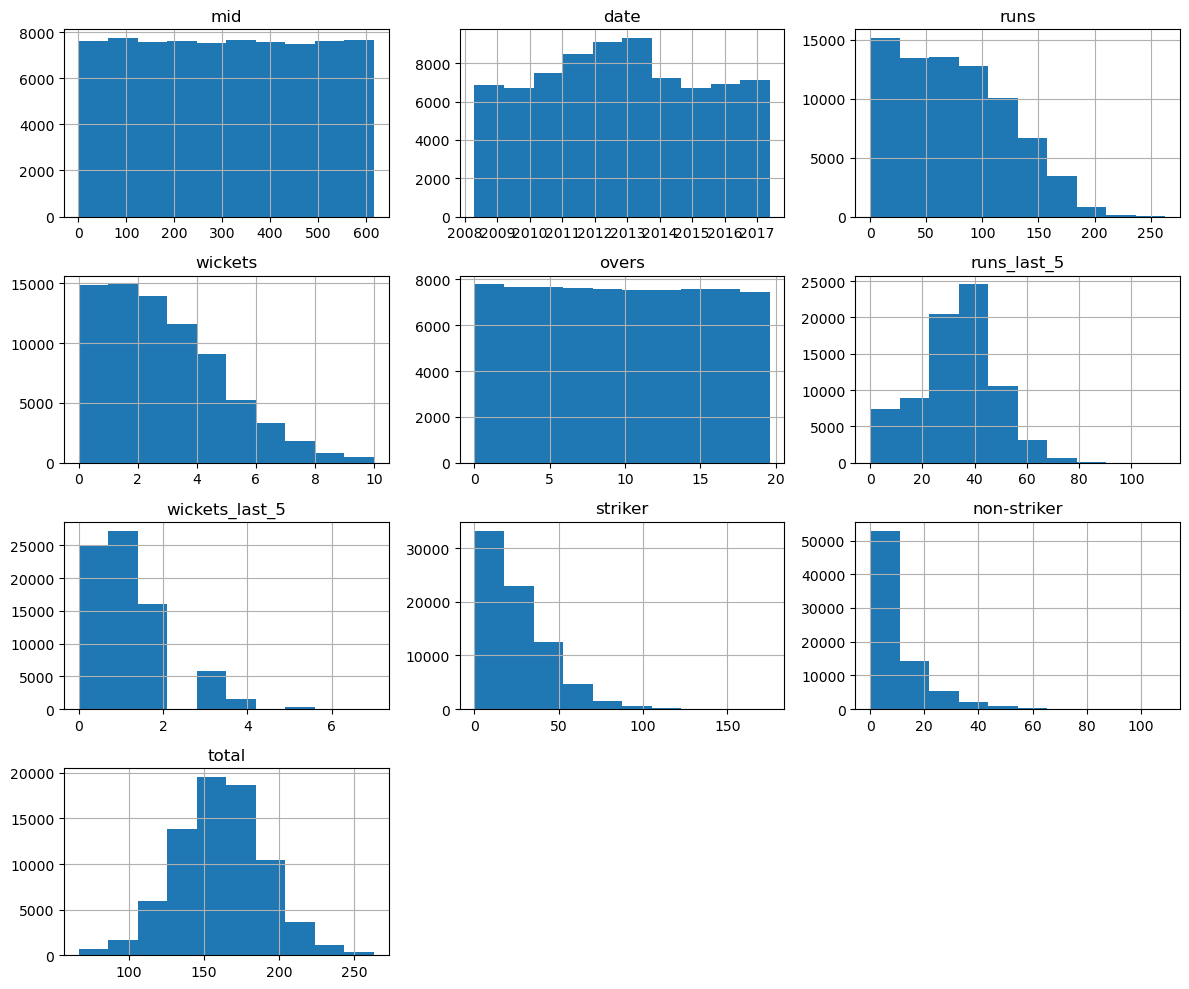

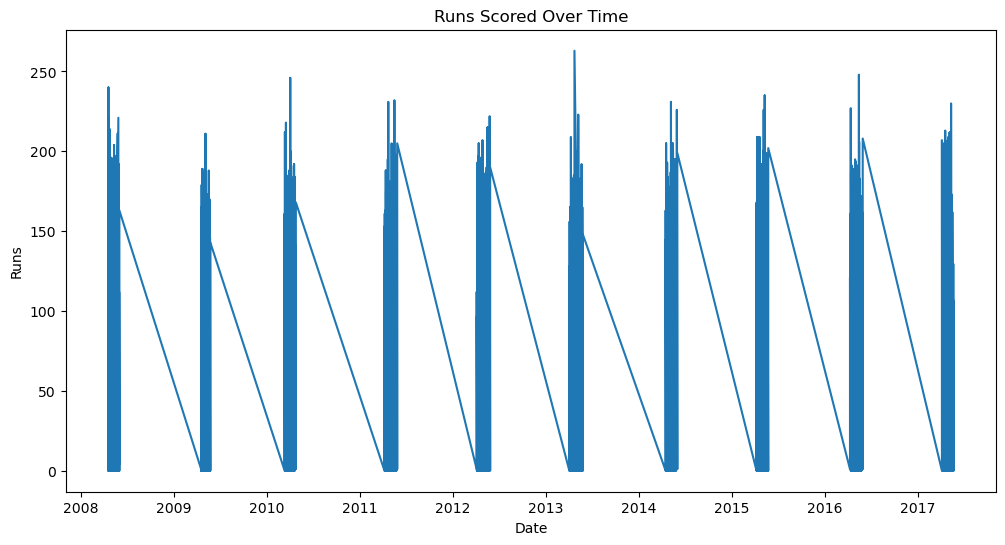

In [11]:
# Explore the distribution of numerical variables
import matplotlib.pyplot as plt
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Step 5: Data Visualization
# Plot the trend of runs scored over time
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['runs'])
plt.title('Runs Scored Over Time')
plt.xlabel('Date')
plt.ylabel('Runs')
plt.show()

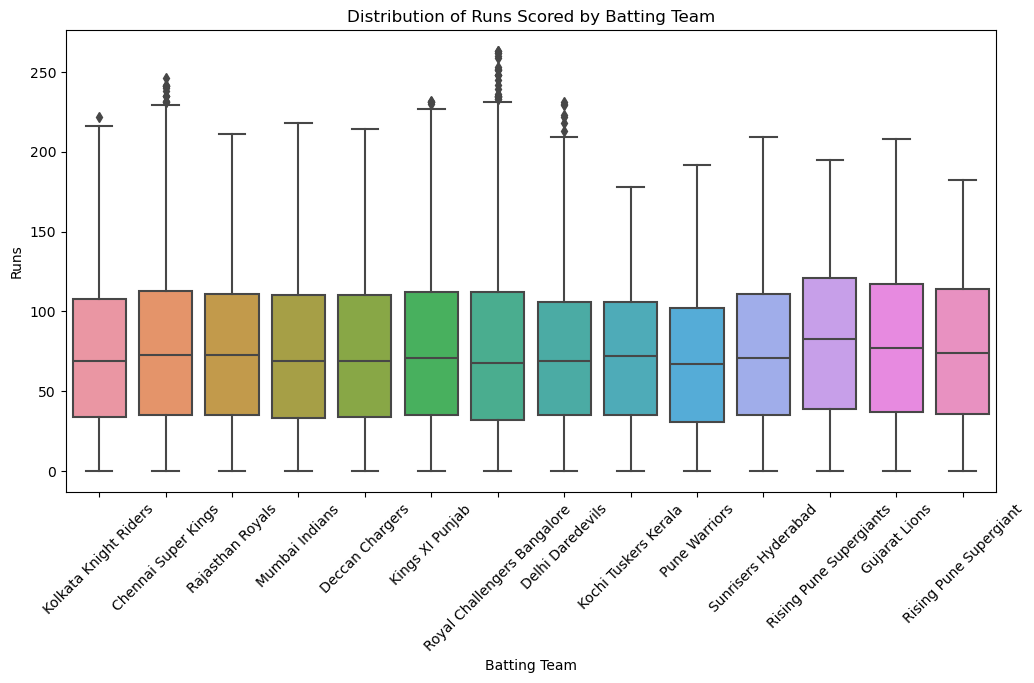

In [12]:
# Visualize the distribution of runs scored by batting team
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(x='bat_team', y='runs', data=data)
plt.title('Distribution of Runs Scored by Batting Team')
plt.xlabel('Batting Team')
plt.ylabel('Runs')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Step 6: Correlation Analysis
# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)


                     mid      runs   wickets     overs  runs_last_5  \
mid             1.000000  0.026470 -0.055220  0.002487     0.045320   
runs            0.026470  1.000000  0.591007  0.938154     0.750565   
wickets        -0.055220  0.591007  1.000000  0.755240     0.242942   
overs           0.002487  0.938154  0.755240  1.000000     0.629374   
runs_last_5     0.045320  0.750565  0.242942  0.629374     1.000000   
wickets_last_5 -0.031886  0.297768  0.693740  0.382850     0.058672   
striker         0.033432  0.594818  0.019712  0.477508     0.675924   
non-striker     0.049975  0.315422 -0.171962  0.236430     0.501475   
total           0.096586  0.254498 -0.337343  0.022282     0.368253   

                wickets_last_5   striker  non-striker     total  
mid                  -0.031886  0.033432     0.049975  0.096586  
runs                  0.297768  0.594818     0.315422  0.254498  
wickets               0.693740  0.019712    -0.171962 -0.337343  
overs                 0.3

In [14]:
# Step 7: Feature Engineering
# Calculate run rate (runs per over)
data['run_rate'] = data['runs'] / data['overs']
# Extract month from the date column
data['month'] = data['date'].dt.month


In [15]:

# Step 8: Domain-specific Analysis
# Example: Identify key players
top_batsmen = data.groupby('batsman')['runs'].sum().nlargest(10)
print(top_batsmen)


batsman
MS Dhoni          179014
SK Raina          144168
RG Sharma         141210
V Kohli           130757
AB de Villiers    118182
KA Pollard        107995
KD Karthik        103441
Yuvraj Singh       95424
S Dhawan           92462
JP Duminy          89566
Name: runs, dtype: int64


In [16]:

# Accessing the 'bat_team' column
batting_teams = data['bat_team']
print(batting_teams)

0        Kolkata Knight Riders
1        Kolkata Knight Riders
2        Kolkata Knight Riders
3        Kolkata Knight Riders
4        Kolkata Knight Riders
                 ...          
76009           Mumbai Indians
76010           Mumbai Indians
76011           Mumbai Indians
76012           Mumbai Indians
76013           Mumbai Indians
Name: bat_team, Length: 76014, dtype: object


In [17]:
# Batsmen Dataset
batsmen_data = data.groupby('batsman')['runs'].sum().reset_index()
batsmen_data.columns = ['batsman', 'total_runs']

# Bowlers Dataset
bowlers_data = data.groupby('bowler')['wickets'].sum().reset_index()
bowlers_data.columns = ['bowler', 'total_wickets']

# Players of the Match Dataset
# Here, we can sum up the runs and wickets for each player (batsman and bowler), and then sort them to find the top performers.
player_performance = data.groupby(['batsman', 'bowler']).agg({'runs': 'sum', 'wickets': 'sum'}).reset_index()
player_performance['total_performance'] = player_performance['runs'] + player_performance['wickets']
top_players = player_performance.nlargest(10, 'total_performance')

# Displaying the datasets
print("Batsmen Dataset:")
print(batsmen_data)
print("\nBowlers Dataset:")
print(bowlers_data)
print("\nTop Players of the Match:")
print(top_players)


Batsmen Dataset:
            batsman  total_runs
0    A Ashish Reddy       12905
1        A Chandila         800
2          A Chopra        1982
3       A Choudhary        1458
4        A Flintoff        2234
..              ...         ...
406       YS Chahal         433
407     YV Takawale        2712
408   Yashpal Singh         517
409    Yuvraj Singh       95424
410          Z Khan        6933

[411 rows x 2 columns]

Bowlers Dataset:
             bowler  total_wickets
0    A Ashish Reddy            265
1        A Chandila            159
2       A Choudhary            127
3        A Flintoff            164
4          A Kumble           1482
..              ...            ...
324      YA Abdulla            265
325       YK Pathan           1489
326       YS Chahal           1564
327    Yuvraj Singh           1301
328          Z Khan           2036

[329 rows x 2 columns]

Top Players of the Match:
          batsman           bowler  runs  wickets  total_performance
9836      V Kohli

In [19]:
# Define file paths for saving the datasets
batsmen_file_path = r"C:\Users\hp\Downloads\IPL project\batsmen_data.csv"
bowlers_file_path = r"C:\Users\hp\Downloads\IPL project\bowlers_data.csv"
top_players_file_path = r"C:\Users\hp\Downloads\IPL project\top_players.csv"


batsmen_data.to_csv(batsmen_file_path, index=False)


bowlers_data.to_csv(bowlers_file_path, index=False)

top_players.to_csv(top_players_file_path, index=False)

print("Datasets saved successfully.")


Datasets saved successfully.
